In [1]:
import scanpy as sc
import gseapy as gp
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./GSE145074_rsem.TPMs.tsv', sep='\t', index_col=0)

In [3]:
import anndata as ad

In [4]:
df

,transcript_id(s),24-SCB_S9,24h-CVB_S10,48h-CVB_S12,48h-SCB_S11,72h-CVB_S14,72h-SCB_S13
gene_id,,,,,,,
A1BG,NM_130786,10.41,7.26,8.03,19.55,9.15,14.47
A1BG-AS1,NR_015380,2.66,1.16,1.51,2.54,2.51,1.89
A1CF,"NM_001198818,NM_001198819,NM_001198820,NM_0145...",29.10,34.38,16.18,22.01,14.24,36.25
A2M,NM_000014,0.88,0.95,2.36,0.67,2.95,1.04
A2M-AS1,NR_026971,1.47,0.97,0.63,1.46,0.10,0.68
...,...,...,...,...,...,...,...
loc4618,lnc2,10.17,8.37,4.35,7.35,4.50,11.68
loc468,lnc8,72.32,56.67,54.43,58.33,54.29,70.70
loc847,lnc7,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
print("Column names:", df.columns)

Column names: Index(['transcript_id(s)', '24-SCB_S9', '24h-CVB_S10', '48h-CVB_S12',
       '48h-SCB_S11', '72h-CVB_S14', '72h-SCB_S13'],
      dtype='object')


In [6]:

expr_data = df.iloc[:, 1:].copy() 

adata = ad.AnnData(X=expr_data.T)
adata.var_names = expr_data.index  
adata.obs_names = expr_data.columns 
status_mapping = {
    "24-SCB_S9": "24_Mock", "24h-CVB_S10": "24_CVB", 
    "48h-CVB_S12": "48_CVB", "48h-SCB_S11": "48_Mock", 
    "72h-CVB_S14": "72_CVB", "72h-SCB_S13": "72_Mock"
}
total_status_mapping = {
    "24-SCB_S9": "Mock", "24h-CVB_S10": "CVB", 
    "48h-CVB_S12": "CVB", "48h-SCB_S11": "Mock", 
    "72h-CVB_S14": "CVB", "72h-SCB_S13": "Mock"
}
adata.obs['status'] = adata.obs_names.map(status_mapping)
adata.obs['total_status'] = adata.obs_names.map(total_status_mapping)

print(adata)
print(adata.obs.head())

AnnData object with n_obs × n_vars = 6 × 25808
    obs: 'status', 'total_status'
              status total_status
24-SCB_S9    24_Mock         Mock
24h-CVB_S10   24_CVB          CVB
48h-CVB_S12   48_CVB          CVB
48h-SCB_S11  48_Mock         Mock
72h-CVB_S14   72_CVB          CVB


In [7]:
adata.obs

,status,total_status
24-SCB_S9,24_Mock,Mock
24h-CVB_S10,24_CVB,CVB
48h-CVB_S12,48_CVB,CVB
48h-SCB_S11,48_Mock,Mock
72h-CVB_S14,72_CVB,CVB
72h-SCB_S13,72_Mock,Mock


In [8]:
adata.X.max()

np.float64(279578.97)

In [9]:
sc.pp.normalize_total(adata)

In [10]:
sc.pp.log1p(adata)

In [11]:
adata.X.max()

np.float64(12.541043878720526)

In [12]:
subset_adata = adata[adata.obs['status'].isin(['24_Mock', '24_CVB','48_CVB','48_Mock'])].copy()

/tmp/ipykernel_3358933/590489726.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


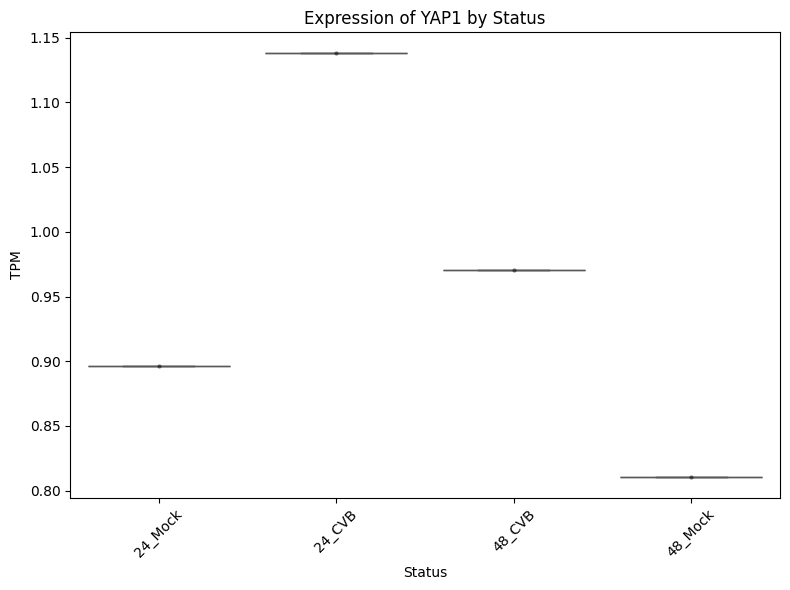

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gene_name = "YAP1"
if gene_name not in subset_adata.var.index:
    raise ValueError(f"Gene {gene_name} not found in subset_adata.var.index")

gene_expression = subset_adata[:, gene_name].X
gene_expression = gene_expression.toarray().flatten() if hasattr(subset_adata.X, "toarray") else gene_expression.flatten()

status = subset_adata.obs['status'].values.flatten()

if len(status) != len(gene_expression):
    raise ValueError("Mismatch in number of samples between status and gene expression")

# Create a DataFrame
plot_data = pd.DataFrame({'Status': status, 'TPM': gene_expression})

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/1779986127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


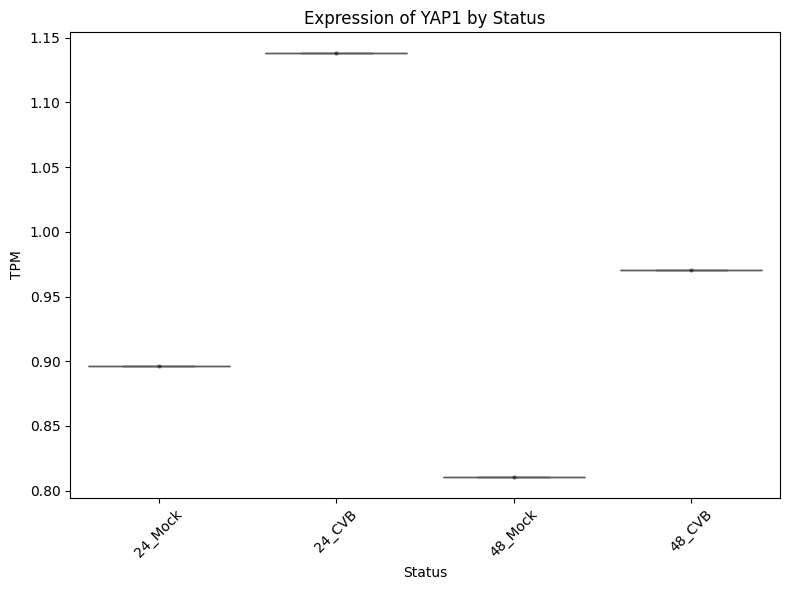

In [15]:
# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/726441035.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()
/tmp/ipykernel_3358933/726441035.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
/tmp/ipykernel_3358933/726441035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)


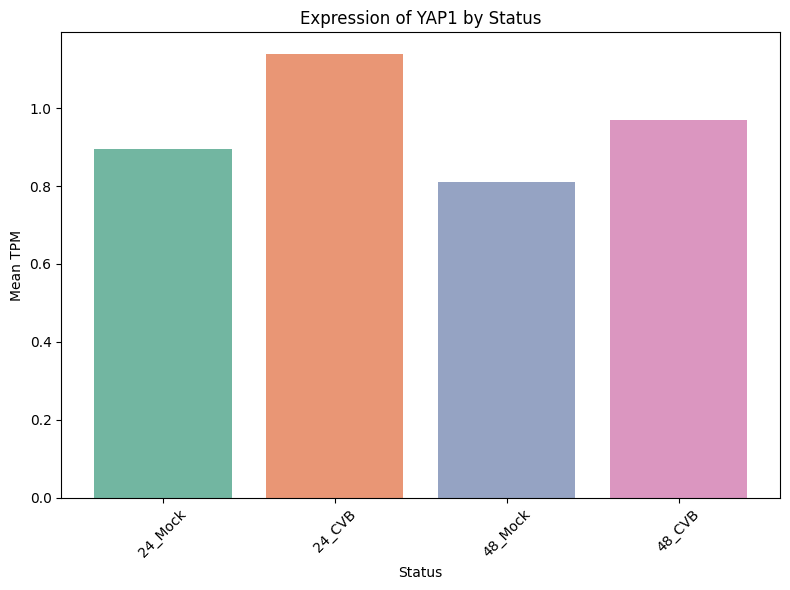

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Calculate the mean and standard error for each status
summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
plt.errorbar(
    x=range(len(summary_stats)),
    y=summary_stats['mean'],
    yerr=summary_stats['sem'],
    fmt='none',
    c='black',
    capsize=5
)

# Customize plot
plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("Mean TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./YAP1.png", dpi=600)

plt.show()


/tmp/ipykernel_3358933/2166246092.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


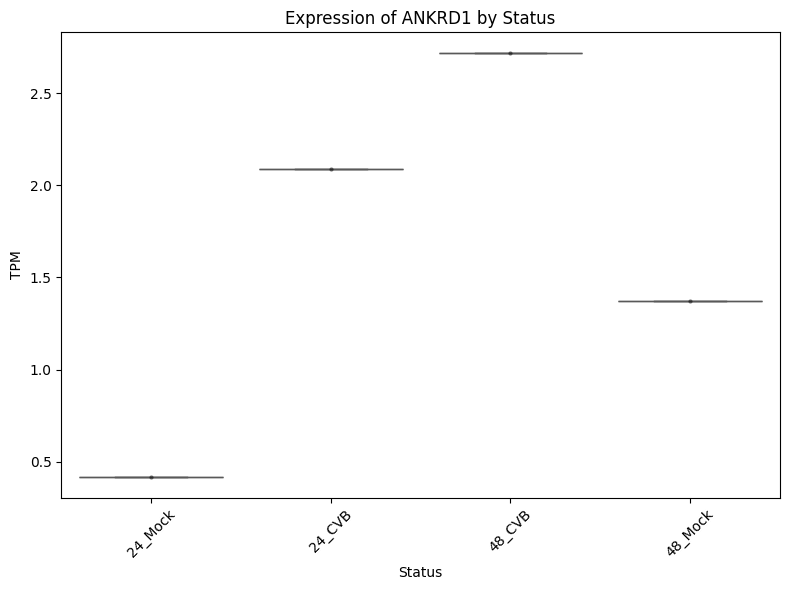

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract gene expression
gene_name = "ANKRD1"
if gene_name not in subset_adata.var.index:
    raise ValueError(f"Gene {gene_name} not found in subset_adata.var.index")

gene_expression = subset_adata[:, gene_name].X
gene_expression = gene_expression.toarray().flatten() if hasattr(subset_adata.X, "toarray") else gene_expression.flatten()

# Extract status
status = subset_adata.obs['status'].values.flatten()

# Ensure matching dimensions
if len(status) != len(gene_expression):
    raise ValueError("Mismatch in number of samples between status and gene expression")

# Create a DataFrame
plot_data = pd.DataFrame({'Status': status, 'TPM': gene_expression})

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/1779986127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


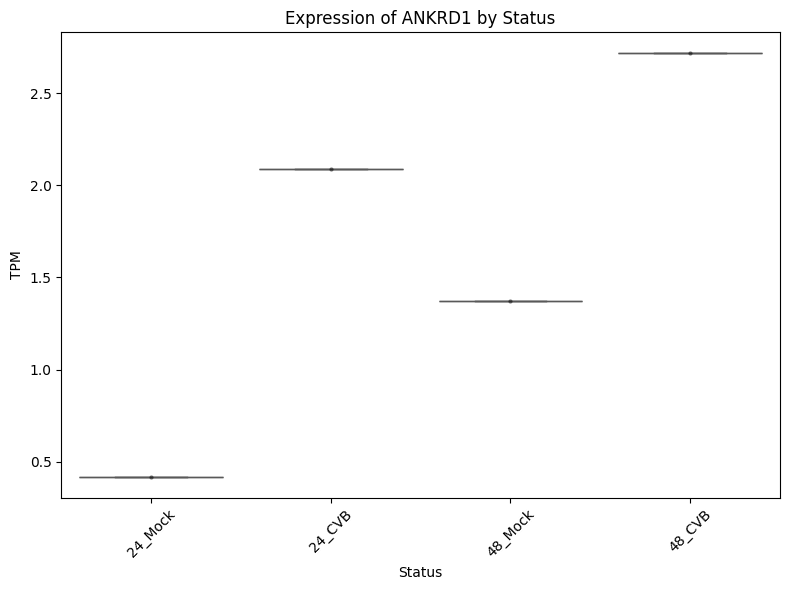

In [26]:
# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/107306620.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()
/tmp/ipykernel_3358933/107306620.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
/tmp/ipykernel_3358933/107306620.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)


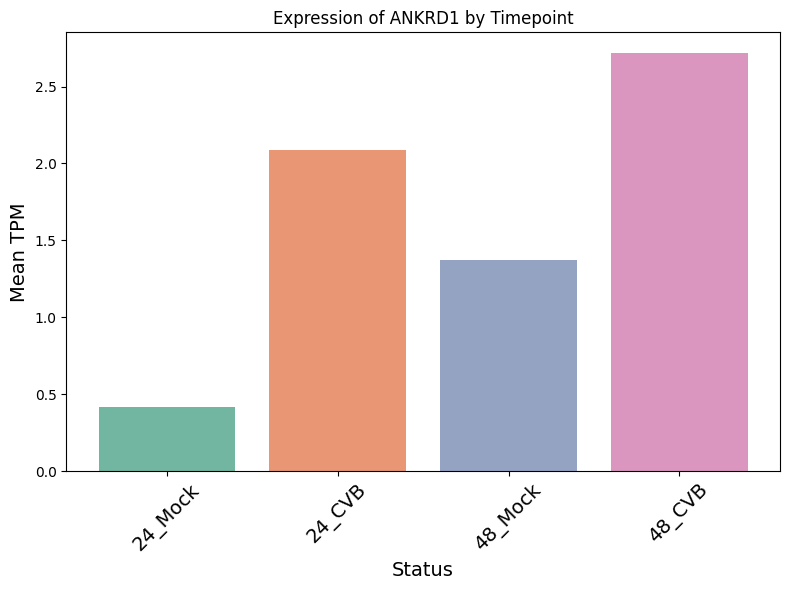

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Calculate the mean and standard error for each status
summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
plt.errorbar(
    x=range(len(summary_stats)),
    y=summary_stats['mean'],
    yerr=summary_stats['sem'],
    fmt='none',
    c='black',
    capsize=5
)

# Customize plot
plt.title(f"Expression of {gene_name} by Timepoint")
plt.xlabel("Status",fontsize=14)
plt.ylabel("Mean TPM",fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.tight_layout()
plt.savefig("./ANKRD1.png", dpi=600)

plt.show()


/tmp/ipykernel_3358933/2287321861.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


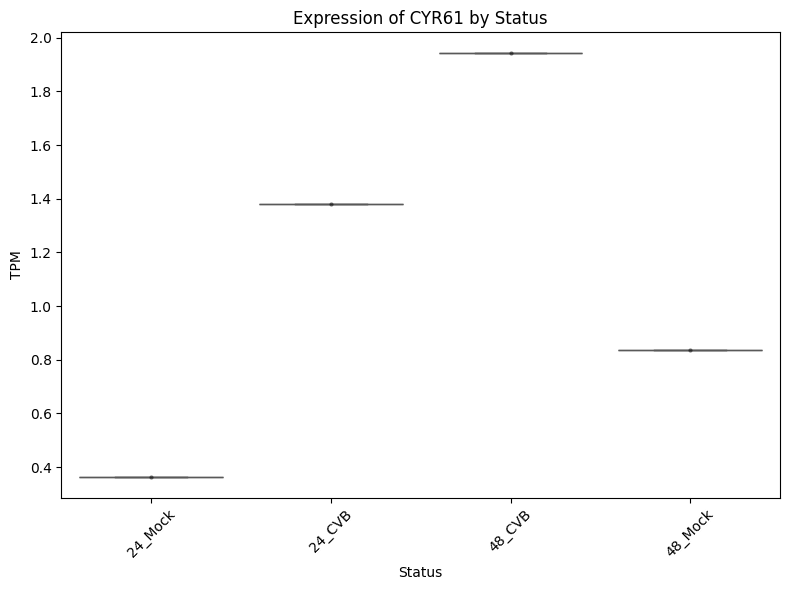

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract gene expression
gene_name = "CYR61"
if gene_name not in subset_adata.var.index:
    raise ValueError(f"Gene {gene_name} not found in subset_adata.var.index")

gene_expression = subset_adata[:, gene_name].X
gene_expression = gene_expression.toarray().flatten() if hasattr(subset_adata.X, "toarray") else gene_expression.flatten()

# Extract status
status = subset_adata.obs['status'].values.flatten()

# Ensure matching dimensions
if len(status) != len(gene_expression):
    raise ValueError("Mismatch in number of samples between status and gene expression")

# Create a DataFrame
plot_data = pd.DataFrame({'Status': status, 'TPM': gene_expression})

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/1779986127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


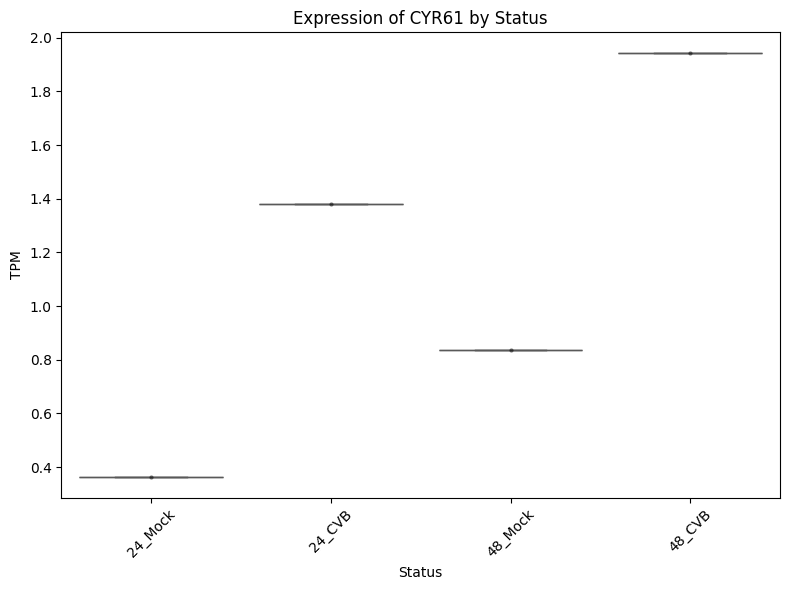

In [23]:
# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/101688741.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()
/tmp/ipykernel_3358933/101688741.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
/tmp/ipykernel_3358933/101688741.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)


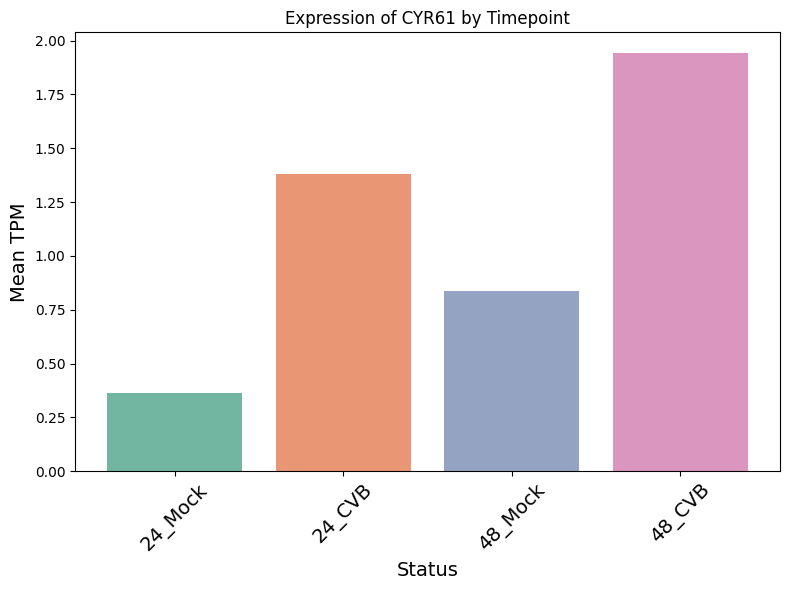

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Calculate the mean and standard error for each status
summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
plt.errorbar(
    x=range(len(summary_stats)),
    y=summary_stats['mean'],
    yerr=summary_stats['sem'],
    fmt='none',
    c='black',
    capsize=5
)

# Customize plot
plt.title(f"Expression of {gene_name} by Timepoint")
plt.xlabel("Status",fontsize=14)
plt.ylabel("Mean TPM",fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.tight_layout()
plt.savefig("./CYR61.png", dpi=600)

plt.show()


/tmp/ipykernel_3358933/2968591727.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


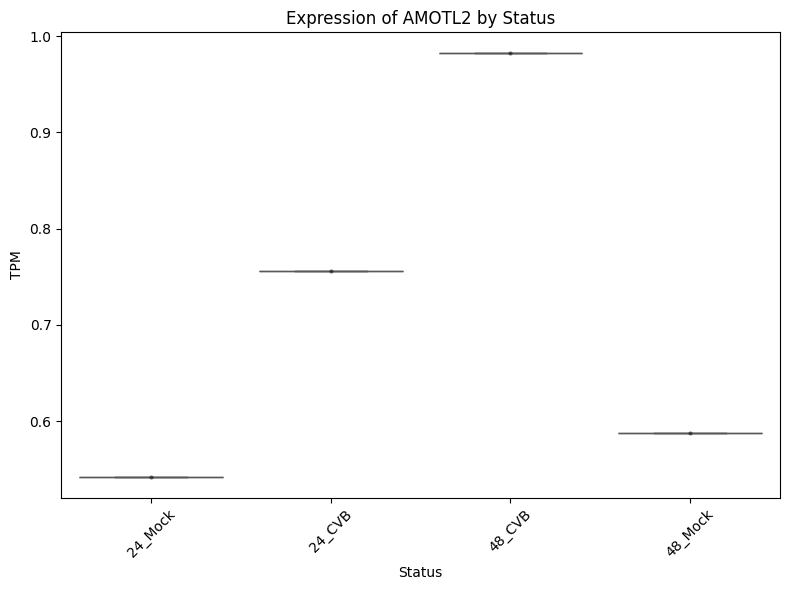

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract gene expression
gene_name = "AMOTL2"
if gene_name not in subset_adata.var.index:
    raise ValueError(f"Gene {gene_name} not found in subset_adata.var.index")

gene_expression = subset_adata[:, gene_name].X
gene_expression = gene_expression.toarray().flatten() if hasattr(subset_adata.X, "toarray") else gene_expression.flatten()

# Extract status
status = subset_adata.obs['status'].values.flatten()

# Ensure matching dimensions
if len(status) != len(gene_expression):
    raise ValueError("Mismatch in number of samples between status and gene expression")

# Create a DataFrame
plot_data = pd.DataFrame({'Status': status, 'TPM': gene_expression})

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/1779986127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')


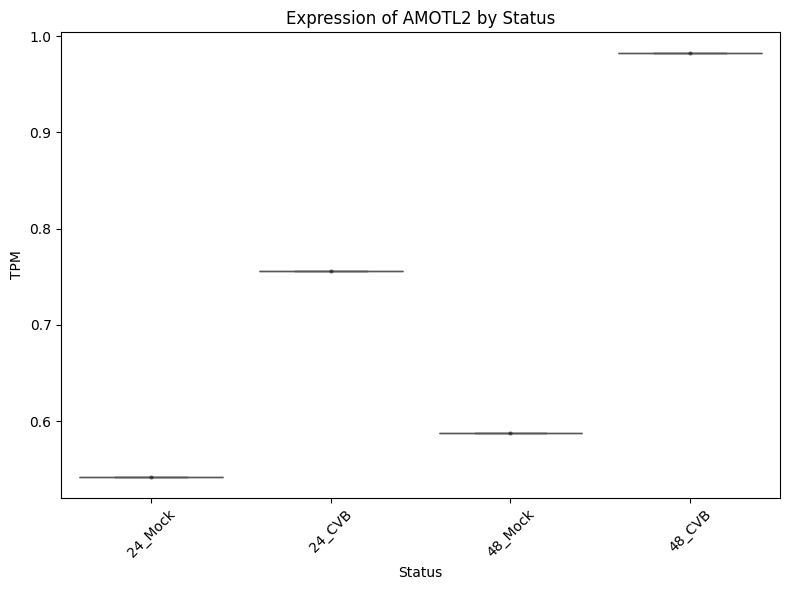

In [20]:
# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Status', y='TPM', palette='Set2')
sns.stripplot(data=plot_data, x='Status', y='TPM', color='black', alpha=0.5, jitter=True, size=3)

plt.title(f"Expression of {gene_name} by Status")
plt.xlabel("Status")
plt.ylabel("TPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3358933/4022676413.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()
/tmp/ipykernel_3358933/4022676413.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
/tmp/ipykernel_3358933/4022676413.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)


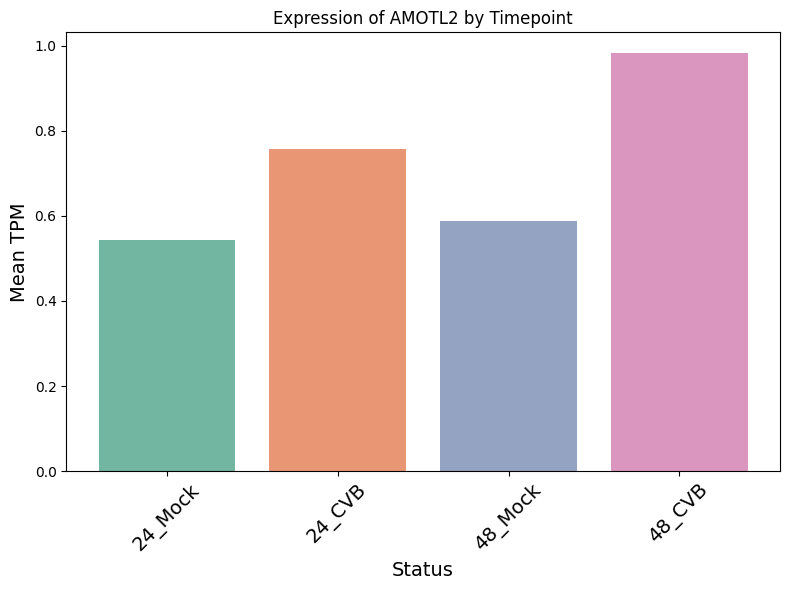

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the desired order of x-axis categories
desired_order = ["24_Mock", "24_CVB", "48_Mock", "48_CVB"]

# Ensure 'Status' column has the desired categorical order
plot_data['Status'] = pd.Categorical(plot_data['Status'], categories=desired_order, ordered=True)

# Calculate the mean and standard error for each status
summary_stats = plot_data.groupby('Status')['TPM'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Status', y='mean', palette='Set2', ci=None)
plt.errorbar(
    x=range(len(summary_stats)),
    y=summary_stats['mean'],
    yerr=summary_stats['sem'],
    fmt='none',
    c='black',
    capsize=5
)

# Customize plot
plt.title(f"Expression of {gene_name} by Timepoint")
plt.xlabel("Status",fontsize=14)
plt.ylabel("Mean TPM",fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.tight_layout()
plt.savefig("./AMOTL2.png", dpi=600)

plt.show()


In [20]:
tweny_four = subset_adata[subset_adata.obs['status'].isin(['24_Mock', '24_CVB'])].copy()

In [26]:
subset_adata.obs

,status,total_status
24-SCB_S9,24_Mock,Mock
24h-CVB_S10,24_CVB,CVB
48h-CVB_S12,48_CVB,CVB
48h-SCB_S11,48_Mock,Mock


In [33]:
import numpy as np
import scipy.stats as stats

# Subset the data for sample 1 and sample 2
adata_sample1 = subset_adata[subset_adata.obs['status'] == '24_Mock']
adata_sample2 = subset_adata[subset_adata.obs['status'] == '24_CVB']

# Calculate the mean expression of YAP1 for both samples
yap1_sample1 = adata_sample1[:, 'YAP1'].X.mean()  # Adjust if raw or non-raw
yap1_sample2 = adata_sample2[:, 'YAP1'].X.mean()  # Adjust if raw or non-raw

# Calculate the log fold change (logFC)
logFC_yap1 = np.log2(yap1_sample2 / yap1_sample1)

# Perform a t-test or Mann-Whitney U test to calculate the p-value
# Use the expression data for YAP1 in both samples (you can access using `adata.X`)
expr_sample1 = adata_sample1[:, 'YAP1'].X.flatten()  # Adjust if raw or non-raw
expr_sample2 = adata_sample2[:, 'YAP1'].X.flatten()  # Adjust if raw or non-raw

# Perform a t-test
t_stat, p_val = stats.ttest_ind(expr_sample1, expr_sample2)

# Print results
print(f"YAP1 logFC: {logFC_yap1}")
print(f"YAP1 p-value (t-test): {p_val}")


YAP1 logFC: 0.34457688489683186
YAP1 p-value (t-test): nan


/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/seurat/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6558: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [36]:
# Perform Mann-Whitney U test instead of t-test
u_stat, p_val_mw = stats.mannwhitneyu(expr_sample1, expr_sample2, alternative='two-sided')

print(f"YAP1 Mann-Whitney U p-value: {p_val_mw}")


YAP1 Mann-Whitney U p-value: 1.0


In [24]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=adata.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=adata.obs.total_status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/seurat/lib/python3.10/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/seurat/lib/python3.10/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


643.9782958030701


In [37]:
res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Response To Fatty Acid (GO:0070542),0.770905,-2.388686,0.126033,0.244345,0.116,2/18,0.89%,OR51E2;NR1H4
1,gsea,Cellular Response To Steroid Hormone Stimulus ...,0.673465,-2.147505,0.118677,0.307594,0.206,7/23,13.76%,OR51E2;AKR1B1;UBE2L3;BMP7;MGARP;ATP1A3;NR3C1
2,gsea,Antiviral Innate Immune Response (GO:0140374),-0.730138,2.099187,0.120553,0.565608,0.151,15/40,6.74%,MX1;IFIT1;IFIT3;OAS1;IFIT2;CXCL10;IFIH1;TRIM6;...
3,gsea,Regulation Of cAMP-mediated Signaling (GO:0043...,0.766834,-2.097191,0.117308,0.274258,0.206,7/16,15.43%,OR51E2;SCTR;PEX5L;PDE2A;GPR61;PDE11A;FFAR4
4,gsea,Defense Response To Virus (GO:0051607),-0.683807,2.052264,0.121514,0.403546,0.212,72/167,8.04%,DDX60;MX1;RSAD2;IFIT1;DDX60L;IFI44L;IFIT3;OAS1...
...,...,...,...,...,...,...,...,...,...,...
2455,gsea,Chromosome Condensation (GO:0030261),-0.1534,0.367175,1.0,0.99983,1.0,19/19,84.68%,AKAP8L;CDCA5;DFFB;CHMP1A;NCAPH2;NCAPG;GPER1;PH...
2456,gsea,Neuromuscular Junction Development (GO:0007528),0.121679,-0.360431,1.0,1.0,1.0,12/24,55.05%,KY;CACNB3;PDZRN3;CACNB1;ZC4H2;MUSK;UNC13B;DCTN...
2457,gsea,Nucleocytoplasmic Transport (GO:0006913),0.120142,-0.354666,1.0,1.0,1.0,32/47,61.88%,NUP37;NUP93;NPM1;NUP43;NUP62;RSRC1;NUP107;NDC1...
2458,gsea,Response To Estradiol (GO:0032355),-0.114086,0.350255,1.0,0.999279,1.0,26/26,88.61%,TGFB1;STAT3;CSN1S1;SFRP1;GPER1;EGFR;KAT5;ZNF70...


In [39]:
res.res2d['NES'] = res.res2d['NES'] * -1

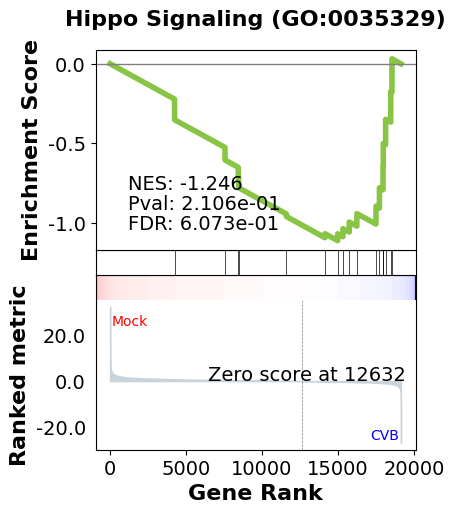

In [40]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms='Hippo Signaling (GO:0035329)')

In [26]:
inflammation_terms = res.res2d[res.res2d['Term'].str.contains('Infl', case=False, na=False)]
inflammation_terms

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
44,gsea,Regulation Of Neuroinflammatory Response (GO:0...,-0.775866,-1.788583,0.117083,0.242731,0.641,9/17,6.46%,NR1D1;IL6;PTGS2;PLCG2;IL33;IL1B;TNF;NUPR1;SPHK1
135,gsea,Positive Regulation Of Cytokine Production Inv...,-0.628138,-1.623929,0.11619,0.310787,0.904,8/16,8.93%,IL6;MYD88;GBP5;TICAM1;TNF;IL17A;STAT3;TLR4
173,gsea,Inflammatory Response (GO:0006954),-0.468896,-1.57285,0.123232,0.3511,1.0,82/187,20.72%,CCR1;CSF1R;FOS;CXCL9;CXCL10;IL6;PTGER4;NOD1;CX...
341,gsea,Regulation Of Inflammatory Response (GO:0050727),-0.347772,-1.434846,0.218504,0.451016,1.0,95/201,28.56%,NR1D1;IL6;TNFAIP3;USP18;KLF4;AGT;PIK3AP1;PTGER...
368,gsea,Regulation Of Cytokine Production Involved In ...,-0.404455,-1.422858,0.122244,0.447611,1.0,14/36,29.09%,IL6;MYD88;GBP5;TICAM1;TNF;PER1;ZC3H12A;IL17A;S...
690,gsea,Acute Inflammatory Response (GO:0002526),-0.411253,-1.259471,0.121272,0.596436,1.0,10/22,15.75%,IL6;PLSCR1;APOL2;IL6R;C2CD4B;C2CD4A;ITIH4;VNN1...
785,gsea,Positive Regulation Of Inflammatory Response (...,-0.353283,-1.223529,0.421471,0.614843,1.0,52/89,26.64%,IL6;AGT;PTGER4;IFI35;PLCG2;IL23A;CASP4;C2CD4B;...
1341,gsea,Positive Regulation Of NLRP3 Inflammasome Comp...,-0.403625,-1.032956,0.50096,0.739417,1.0,6/15,23.60%,MYD88;GBP5;PLCG2;TLR4;PTPN22;DDX3X
1370,gsea,Regulation Of NLRP3 Inflammasome Complex Assem...,-0.330826,-1.021585,0.523046,0.747701,1.0,26/26,96.85%,MYD88;EIF2AK2;GBP5;PLCG2;TRIM31;TLR4;IRGM;PTPN...
1430,gsea,Negative Regulation Of Inflammatory Response (...,-0.245777,-1.004456,0.426263,0.75692,1.0,98/98,99.60%,NR1D1;TNFAIP3;KLF4;PTGER4;PLK2;LYN;IL33;FNDC4;...


In [ ]:
from gseapy import dotplot
import matplotlib.pyplot as plt

# Filter DataFrame to include only the desired term
filtered_res = res.res2d[res.res2d['Term'].isin([
    'Regulation Of Hippo Signaling (GO:0035330)',
    'Inflammatory Response (GO:0006954)',
    'Antiviral Innate Immune Response (GO:0140374)',
    'Regulation Of Innate Immune Response (GO:0045088)',
    'Regulation Of Type I Interferon Production (GO:0032479)',
    'Cellular Response To Type II Interferon (GO:0071346)',
    'Regulation Of Interferon-Alpha Production (GO:0032647)',
    'Cellular Response To Virus (GO:0098586)',
    'Apoptotic Process (GO:0006915)',
    'Regulation Of Programmed Cell Death (GO:0043067)'
])]

# Ensure filtered data has more than one row or select a categorical variable if needed
ax = dotplot(filtered_res, 
             column="FDR q-val",
             title='Beta Cells (GO Biological Process 2023)',
             cmap=plt.cm.viridis,
             y='Term',  # Use the y-axis as 'Term' to avoid mismatched size issues
             size=5,
             figsize=(5,6), 
             cutoff=1,
              ofname="./stellate_cells_GSEA_Interested_terms.png")
plt.show()


In [15]:
import numpy as np
from scipy import sparse

# New list of genes
genes_of_interest = [ 'CCN1', 'CCN2', 'AMOTL2', 'IGFBP3', 'F3', 'FJX1', 'NUAK2', 'LATS2', 'CRIM1', 
    'GADD45A', 'TGFB2', 'PTPN14', 'NT5E', 'FOXF2', 'AXL', 'DOCK5', 'ASAP1', 
    'RBMS3', 'MYOF', 'ARHGEF17', 'CCDC80', 'MMP7']

# Filter the genes that are available in the dataset
genes_available = [gene for gene in genes_of_interest if gene in adata.var_names]

# Subset adata to get expression of genes of interest
adata_subset = adata[:, genes_available]

# Calculate the mean and standard deviation per gene (across cells) using sparse matrix operations
X = adata_subset.X

if sparse.issparse(X):
    mean_per_gene = np.array(X.mean(axis=0)).flatten()  # Mean per gene
    std_per_gene = np.sqrt(X.multiply(X).mean(axis=0) - mean_per_gene**2)  # Std per gene
else:
    mean_per_gene = X.mean(axis=0)
    std_per_gene = X.std(axis=0)

# Avoid division by zero for genes with zero standard deviation
std_per_gene[std_per_gene == 0] = 1

# Calculate z-scores for the genes of interest across cells
z_scores = (X - mean_per_gene) / std_per_gene

# Calculate mean z-score for each cell
mean_z_scores_per_cell = np.array(z_scores.mean(axis=1)).flatten()

# Add the mean z-score as a new column in adata.obs
adata.obs['YAP_Target_Genes'] = mean_z_scores_per_cell


In [16]:
sc.set_figure_params(dpi_save=600)

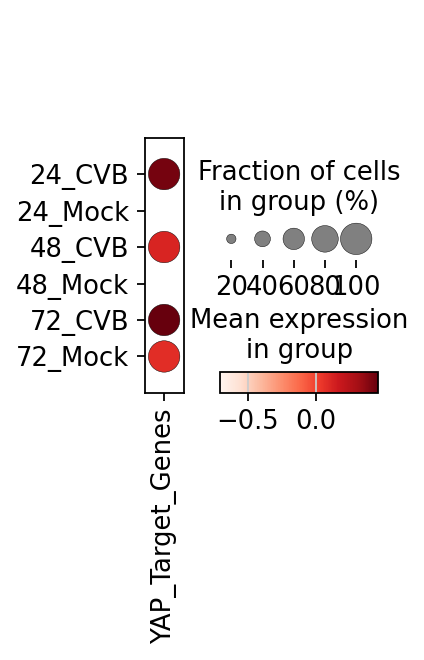

In [19]:
sc.pl.dotplot(adata, var_names='YAP_Target_Genes',groupby='status',swap_axes=False,save='total_yap_tatget_z_score.svg')

In [11]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
yap_alpha = gp.gsea(data=adata.to_df().T, # row -> genes, column-> samples
        gene_sets="../yap_target_genes.gmt",
        cls=adata.obs.total_status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/seurat/lib/python3.10/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/seurat/lib/python3.10/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


3.1584560871124268


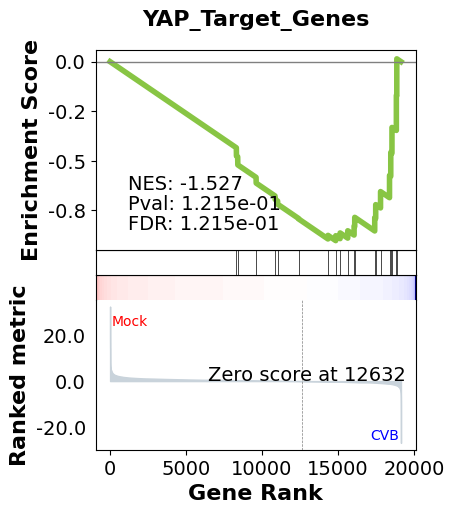

In [12]:
term = yap_alpha.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = yap_alpha.plot(terms='YAP_Target_Genes')

In [20]:
import numpy as np
from scipy import sparse

# New list of genes (YAP-related genes)
genes_of_interest = ['WWTR1', 'YAP1', 'MOB1A', 'SAV1', 'STK3', 'STK4', 'LATS2', 'LATS1', 
                     'MOB1B', 'AMOTL1', 'FAT4', 'AMOTL2', 'DCHS1', 'TEAD1', 'TEAD2', 
                     'TEAD3', 'TEAD4']

# Filter the genes that are available in the dataset
genes_available = [gene for gene in genes_of_interest if gene in adata.var_names]

# Subset adata to get expression of genes of interest
adata_subset = adata[:, genes_available]

# Calculate the mean and standard deviation per gene (across cells) using sparse matrix operations
X = adata_subset.X

if sparse.issparse(X):
    mean_per_gene = np.array(X.mean(axis=0)).flatten()  # Mean per gene
    std_per_gene = np.sqrt(X.multiply(X).mean(axis=0) - mean_per_gene**2)  # Std per gene
else:
    mean_per_gene = X.mean(axis=0)
    std_per_gene = X.std(axis=0)

# Avoid division by zero for genes with zero standard deviation
std_per_gene[std_per_gene == 0] = 1

# Calculate z-scores for the genes of interest across cells
z_scores = (X - mean_per_gene) / std_per_gene

# Calculate mean z-score for each cell
mean_z_scores_per_cell = np.array(z_scores.mean(axis=1)).flatten()

# Add the mean z-score as a new column in adata.obs
adata.obs['Hippo Signaling (GO:0035329)'] = mean_z_scores_per_cell


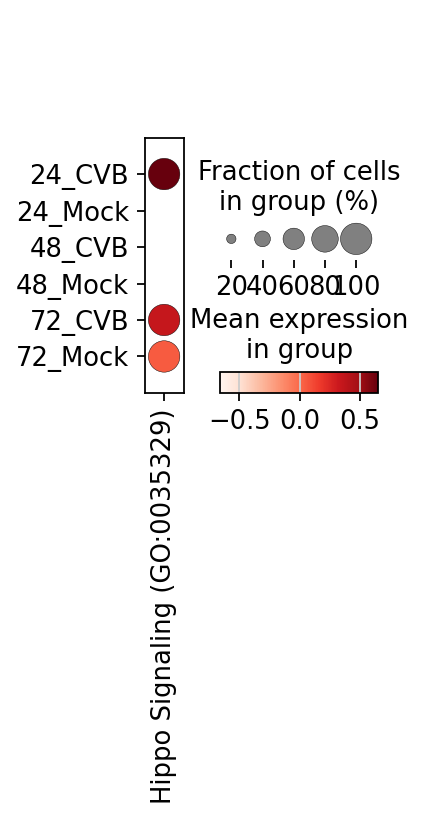

In [21]:
sc.pl.dotplot(adata, var_names='Hippo Signaling (GO:0035329)',groupby='status',swap_axes=False,save='hippo_status.svg')

In [22]:
adata.obs['status']

24-SCB_S9      24_Mock
24h-CVB_S10     24_CVB
48h-CVB_S12     48_CVB
48h-SCB_S11    48_Mock
72h-CVB_S14     72_CVB
72h-SCB_S13    72_Mock
Name: status, dtype: object

In [23]:
# Subset the AnnData object
subset_adata = adata[adata.obs['status'].isin(['24_Mock', '24_CVB','48_CVB','48_Mock'])].copy()

# Check the new subset
print(subset_adata)


AnnData object with n_obs × n_vars = 4 × 25808
    obs: 'status', 'total_status', 'YAP_Target_Genes', 'Hippo Signaling (GO:0035329)'
    uns: 'log1p'


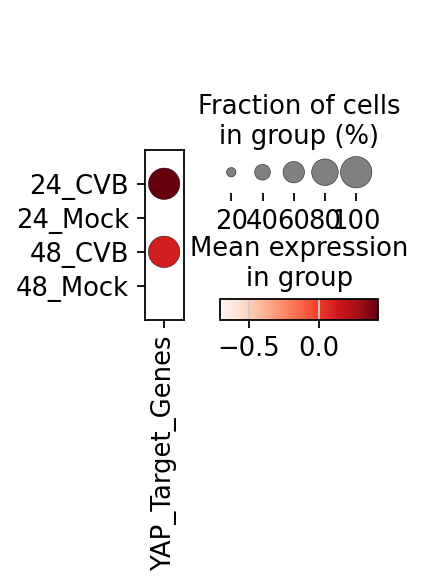

In [24]:
sc.pl.dotplot(subset_adata, var_names='YAP_Target_Genes',groupby='status',swap_axes=False,save='total_yap_tatget_z_score.svg')

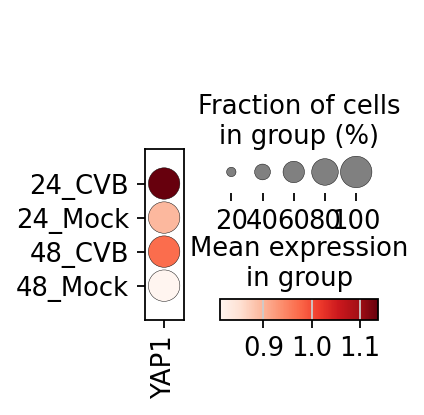

In [25]:
sc.pl.dotplot(subset_adata, var_names='YAP1',groupby='status',swap_axes=False,save='YAP1_z_score.svg')

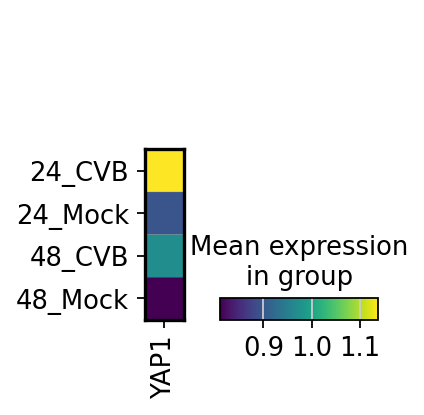

In [26]:
sc.pl.matrixplot(subset_adata, var_names='YAP1',groupby='status',swap_axes=False,save='YAP1_z_score.svg')

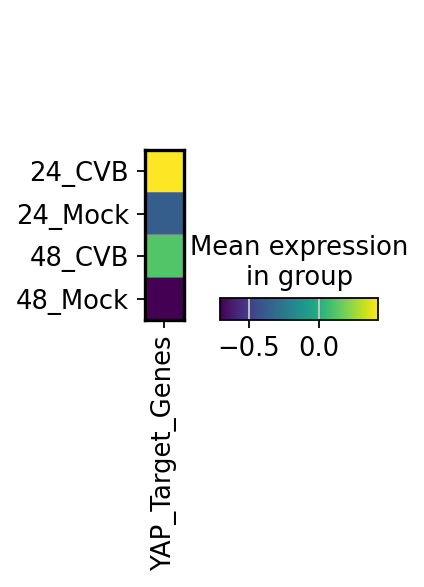

In [27]:
sc.pl.matrixplot(subset_adata, var_names='YAP_Target_Genes',groupby='status',swap_axes=False,save='YAP_Target_Genes.svg')